# Q - Learning

## Frozen Lake

Vamos a usar una herramienta llamada Open AI Gym que permite testear algoritmos de reinforcement learning con ambientes ya creados.

In [1]:
import gym

In [2]:
env = gym.make('FrozenLake-v0') # usamos el ambiente FrozenLake

En el ambiente el agente se mueve sobre unas celdas que tienen la siguiente forma:

    SFFF
    FHFH
    FFFH
    HFFG

La *S* es el punto de inicio, las *F* los puntos seguros para caminar, las *H* son agujeros donde caes y mueres :( y la *G* en objetivo final.

In [3]:
print(env.observation_space.n) # numero de estados
print(env.action_space.n) # numero de acciones

16
4


In [5]:
env.reset() # para volver al estado inicial

0

In [8]:
# escoger una acción aleatoria
action = env.action_space.sample()
print(action)

1


In [9]:
observation, reward, done, info = env.step(action)
# que estado va despues de la accion, que recompensa da la accion, si se gano
# o no el juego e informacion

In [10]:
env.render()

  (Down)
SFFF
FHFH
FFFH
HFFG


Como hemos visto tenemos 16 estados y cuatro posibles acciones

### Construir la tabla Q

In [12]:
import numpy as np
import time

In [13]:
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [14]:
Q = np.zeros((STATES, ACTIONS))
Q # tabla de ceros

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

#### Constantes del aprendizaje

In [15]:
EPISODES = 10000 # cuantas veces se recorrera el ambiente
MAX_STEPS = 100 # maximo numero de pasos en cada intento del ambiente

LEARNING_RATE = 0.81
GAMMA = 0.96

#### Escoger una acción

 - Al azar
 - Escoger un valor de la tabla Q

In [ ]:
epsilon = 0.9 # 90% de prob de escoger una accion al azar

if np.random.uniform(0,1) < epsilon:
    action = env.action_space.sample()
else:
    action = np.argmax(Q[state, :])

#### Actualizar los datos de la tabla

La formulita

In [ ]:
Q[estado,accion] = Q[estado,accion] + 
                   LEARNING_RATE*(recompensa + GAMMA*max(Q[nuevo_estado,:])
                                  - Q[estado,accion])

### Ahora todo junto

In [54]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 60000
MAX_STEPS = 100

LEARNING_RATE = 0.85 # default=0.81
GAMMA = 0.95 # default=0.96

RENDER = False # poner en True si queremos ver el juego

epsilon = 0.9

In [55]:
rewards = []
for episode in range(EPISODES):
    
    state = env.reset()
    for _ in range(MAX_STEPS):
        if RENDER:
            env.render()
        
        if np.random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
        
        new_state, reward, done, _ = env.step(action)
        
        Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])
        
        state = new_state
        
        if done:
            rewards.append(reward)
            epsilon -= 0.001
            break # se ha alcanzado la meta
            
print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}")

[[3.49089742e-01 6.75287848e-04 7.13665661e-04 7.06723762e-04]
 [5.22606331e-04 1.48338001e-04 1.39237798e-04 2.37659861e-01]
 [1.61231863e-01 4.60316251e-04 1.68451162e-04 5.22153326e-04]
 [1.38736159e-04 1.10314899e-04 3.92663937e-04 5.27561863e-04]
 [4.67213851e-01 2.99280725e-04 2.33441723e-04 1.16367107e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.31573081e-02 1.73679922e-11 1.70262624e-11 1.96180565e-11]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.34901689e-04 3.39635004e-04 3.41740594e-04 5.67235407e-01]
 [1.49189279e-04 5.59696326e-01 2.32523921e-04 2.43021368e-04]
 [1.71408465e-01 1.04520926e-05 7.51000486e-06 1.68401632e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.41447567e-03 1.23419152e-02 8.94149980e-01 1.74065358e-02]
 [3.88849073e-02 9.99903784e-01 2.18059801e-02 1.91700559e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

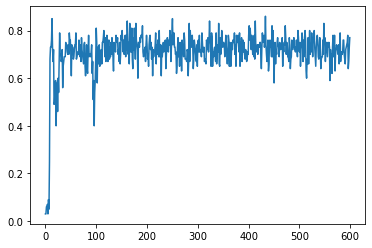

In [56]:
import matplotlib.pyplot as plt

def get_average(values):
    return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
    avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)